# EDA, FE 세션 추가과제

* 본 과제는 추가과제이므로 수행 및 제출은 자율입니다.

* 시각화 및 전처리를 처음부터 끝까지 자율적으로 수행해보자!

* titanic, airbnb dataset으로 해보셔도 괜찮지만, 이미 했던 내용을 반복하는 것이 크게 의미가 없을 수도 있기 때문에 새로운 데이터를 가져왔습니다. 처음부터 끝까지 전처리 과정을 진행해보고 싶으신 분들에게 추천합니다!

* 문제로 제시된 그래프/전처리 외에 본인이 생각했을 때 필요하다고 생각하는 과정을 진행해주세요

#### 데이터 소개

* 월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회 데이터
* 신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측하는 프로젝트

* 데이터 설명: https://www.dacon.io/competitions/official/235713/talkboard/402821/

* 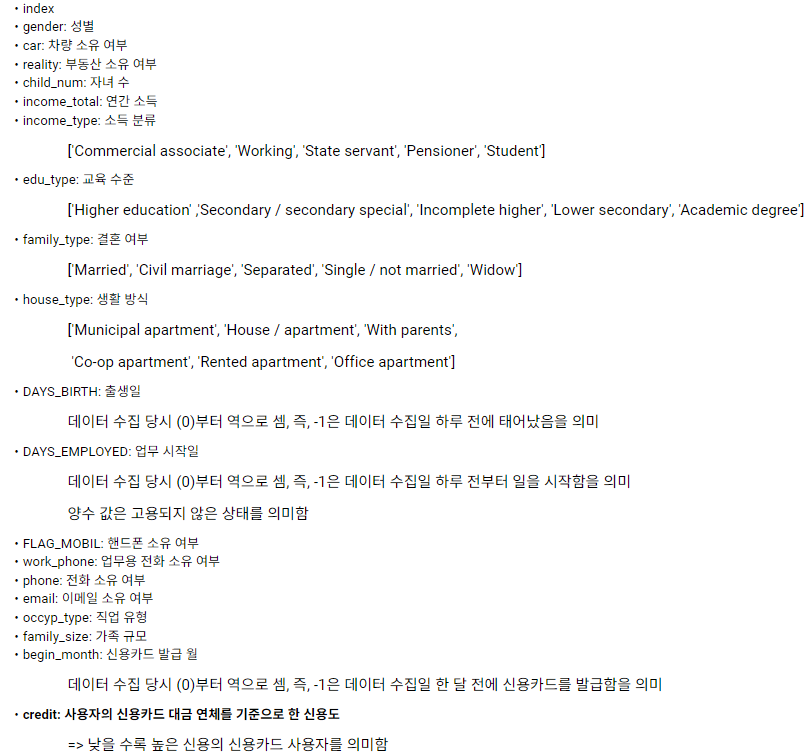


In [40]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [176]:
#path = '/content/drive/MyDrive/YBIGTA/0108 EDA, FE 발제/'
X_train = pd.read_csv('train_dacon.csv').drop(labels='index', axis=1)
y_train = pd.read_csv('train_label_dacon.csv').drop(labels='index', axis=1)

train = pd.concat([X_train, y_train], axis=1)

In [42]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,365243,1,0,0,0,NaN,2,-53,1
1,F,N,N,1,157500.0,Working,Higher education,Married,House / apartment,-15773,-309,1,0,1,0,Sales staff,3,-26,0
2,M,Y,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13483,-1816,1,1,1,0,Laborers,2,-9,1
3,F,Y,N,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12270,-150,1,0,1,0,Security staff,4,-12,1
4,M,Y,Y,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,-16175,-2371,1,0,0,0,Drivers,3,-3,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13228 entries, 0 to 13227
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         13228 non-null  object 
 1   car            13228 non-null  object 
 2   reality        13228 non-null  object 
 3   child_num      13228 non-null  int64  
 4   income_total   13228 non-null  float64
 5   income_type    13228 non-null  object 
 6   edu_type       13228 non-null  object 
 7   family_type    13228 non-null  object 
 8   house_type     13228 non-null  object 
 9   DAYS_BIRTH     13228 non-null  int64  
 10  DAYS_EMPLOYED  13228 non-null  int64  
 11  FLAG_MOBIL     13228 non-null  int64  
 12  work_phone     13228 non-null  int64  
 13  phone          13228 non-null  int64  
 14  email          13228 non-null  int64  
 15  occyp_type     9096 non-null   object 
 16  family_size    13228 non-null  int64  
 17  begin_month    13228 non-null  int64  
 18  credit

## **EDA**


> ### **1. 결측치 시각화**




Q1. missingno를 활용한 시각화



<Axes: >

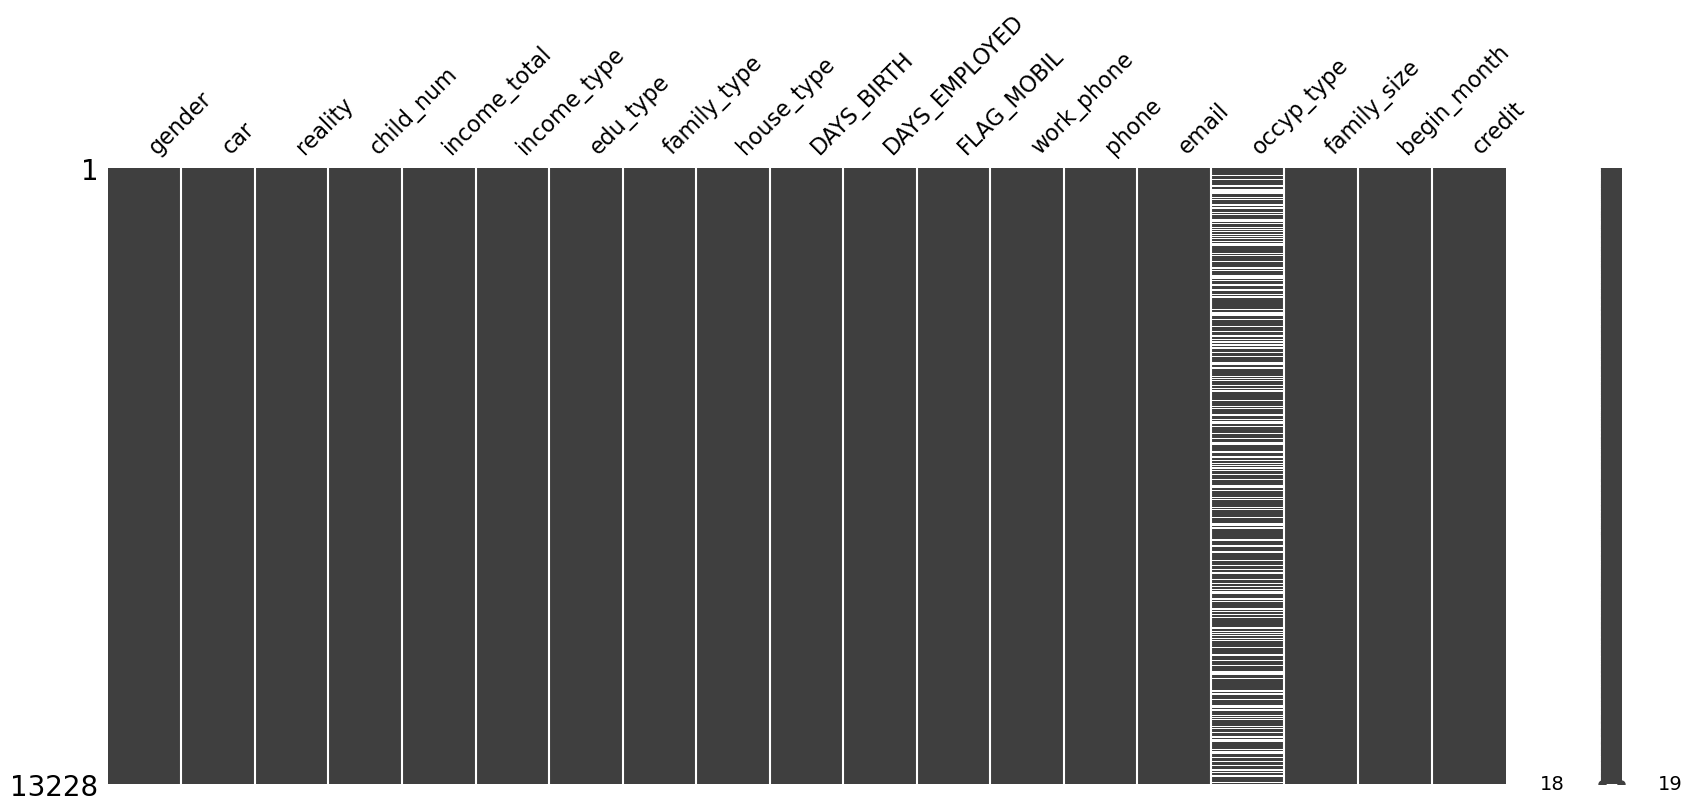

In [11]:
### Q1. missingno를 활용한 시각화 ###

import missingno as msno

msno.matrix(df=train, figsize=(20, 8))

> ###  **2. 범주형 변수 확인**






**Q2. 범주형 변수에 따른 label 분포 차이를 확인해보세요**

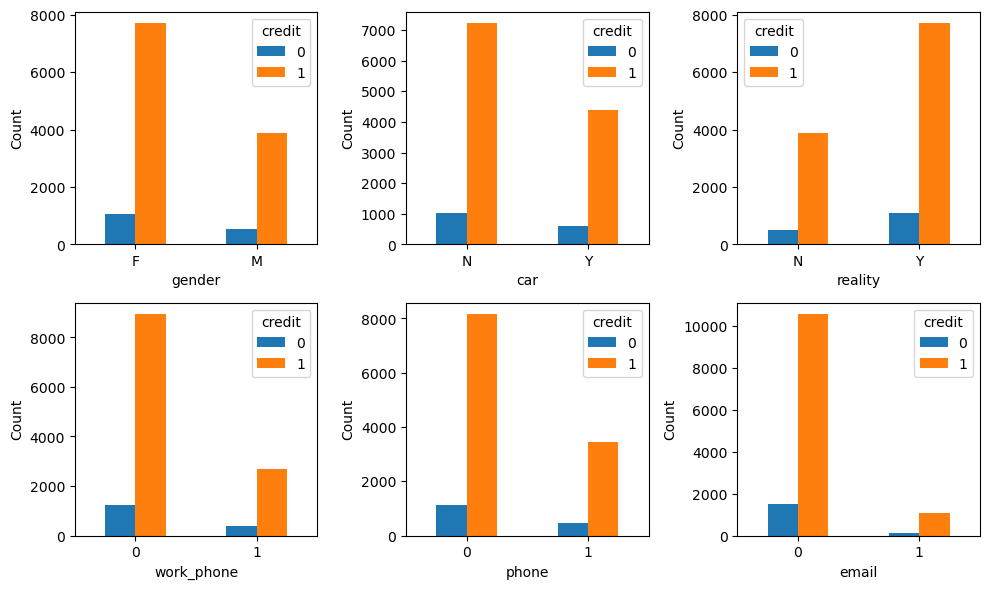

In [54]:
### 예시 ###
binary_columns = ['gender', 'car', 'reality', 'work_phone', 'phone', 'email']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for i, column in enumerate(binary_columns):
    credit_counts = train.groupby([f'{column}', 'credit'])['credit'].count().unstack('credit')
    credit_counts.plot(kind='bar', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_xlabel(column)
    axes[i//3, i%3].set_ylabel('Count')
    axes[i//3, i%3].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

* 여러 개의 범주를 가진 데이터 분포 확인해보기

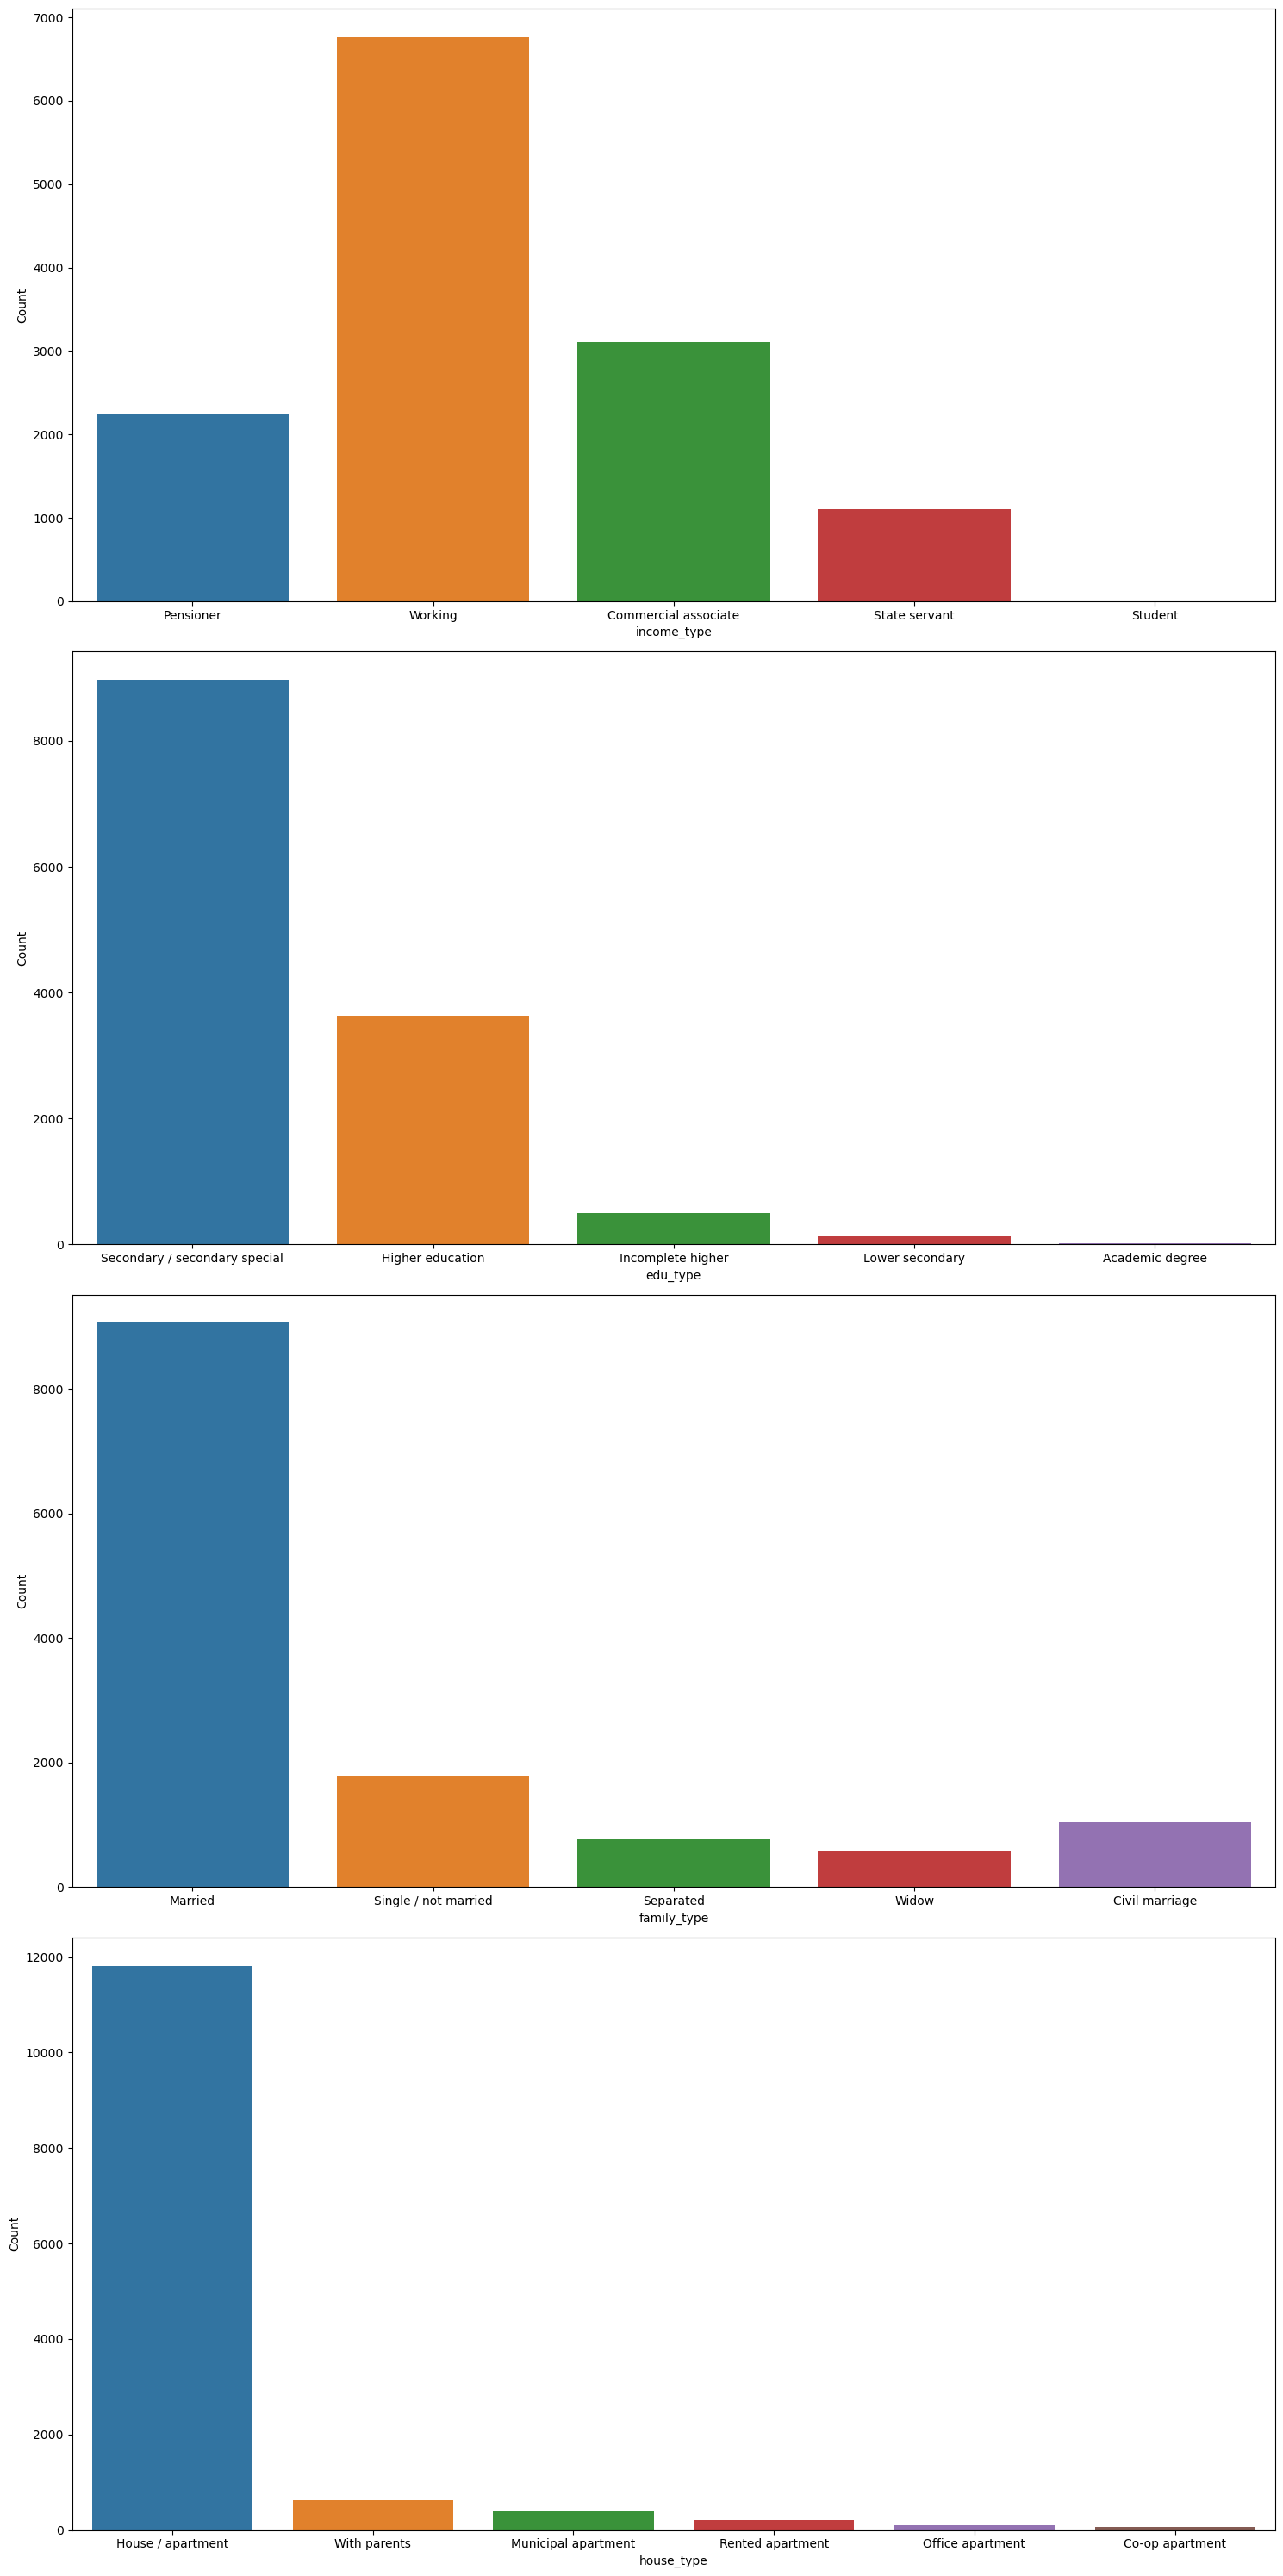

In [45]:
categories = ['income_type', 'edu_type', 'family_type', 'house_type']

fig, axes = plt.subplots(len(categories),1, figsize=(15, 30))

for i, column in enumerate(categories):
    sns.countplot(x=column, data = train, ax = axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Q3. occyp_type의 카테고리에 어떤 것이 있는지 확인

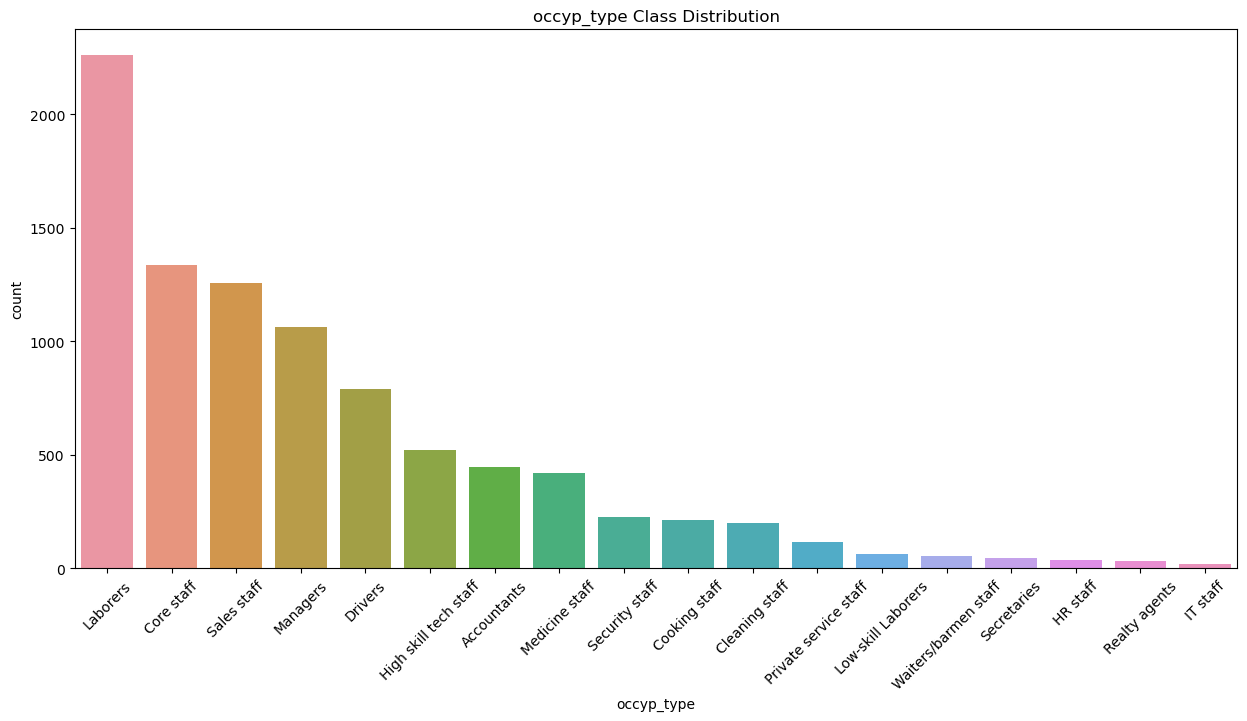

In [50]:
# occyp_type

plt.figure(figsize = (15,7))
sns.countplot(x = 'occyp_type', data = train, order = train['occyp_type'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('occyp_type Class Distribution')
plt.show()



> ### **3. 연속형 변수 확인**



**Q4. 히스토그램**

In [56]:
# 수치형 데이터 중 이진형 데이터를 제외한 나머지를 히스토그램으로 시각화 
train._get_numeric_data()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,202500.0,-19031,365243,1,0,0,0,2,-53,1
1,1,157500.0,-15773,-309,1,0,1,0,3,-26,0
2,0,135000.0,-13483,-1816,1,1,1,0,2,-9,1
3,2,112500.0,-12270,-150,1,0,1,0,4,-12,1
4,1,225000.0,-16175,-2371,1,0,0,0,3,-3,1
...,...,...,...,...,...,...,...,...,...,...,...
13223,0,225000.0,-20657,-5637,1,0,0,0,1,-43,1
13224,0,292500.0,-18409,-3482,1,0,0,0,2,-53,1
13225,0,135000.0,-14625,-7827,1,0,1,1,2,-34,1
13226,1,157500.0,-10676,-2326,1,0,1,1,3,-16,1


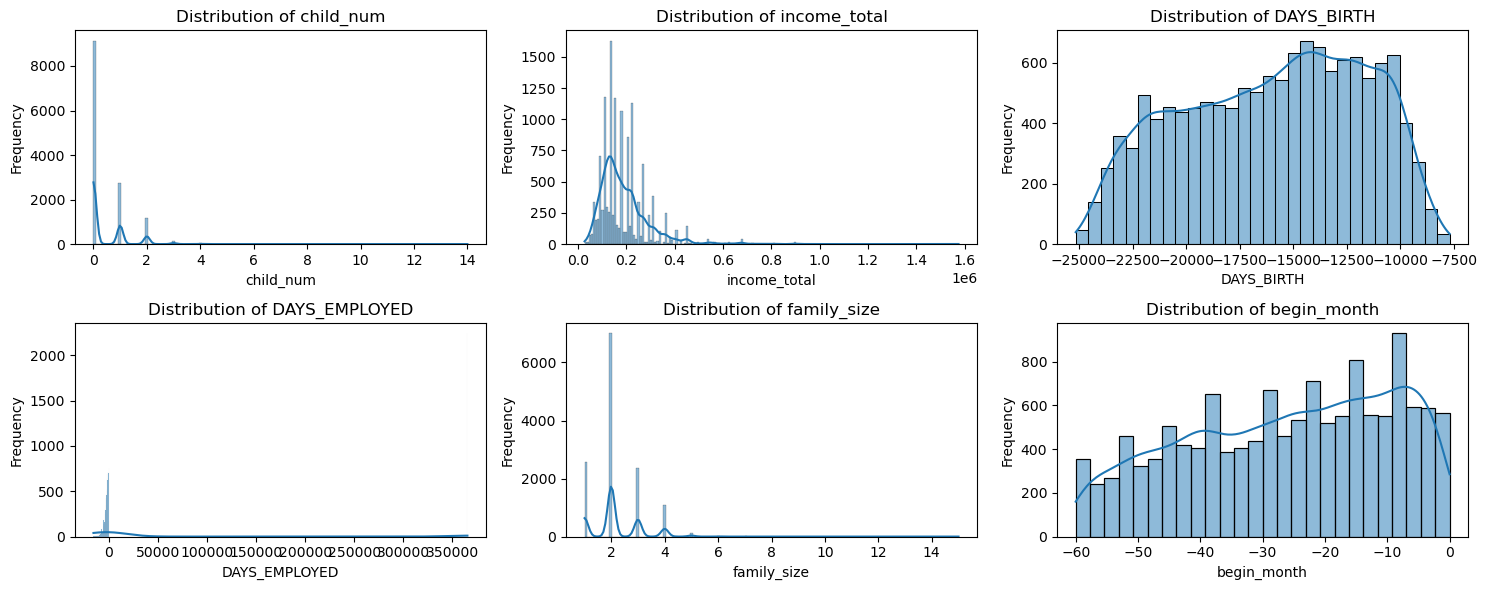

In [65]:
### histogram

columns = ['child_num','income_total','DAYS_BIRTH','DAYS_EMPLOYED','family_size','begin_month']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

for i, column in enumerate(columns):
    sns.histplot(train[column],kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {column}')
    axes[i//3, i%3].set_xlabel(column)
    axes[i//3, i%3].set_ylabel('Frequency')
    axes[i//3, i%3].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

> ### **4. 변수간의 상관관계 확인**

Q5. income type에 따른 income total의 값을 확인해보세요

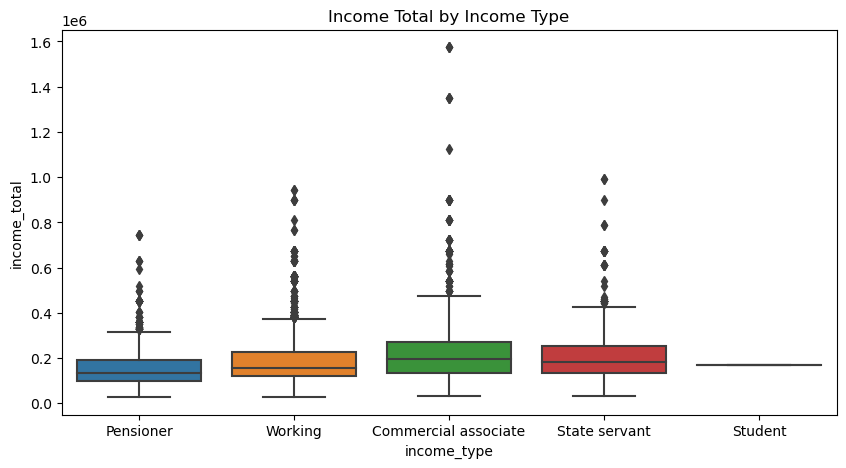

In [68]:
plt.figure(figsize=(10,5))
sns.boxplot(x='income_type', y='income_total', data = train)
plt.title('Income Total by Income Type')
plt.show()

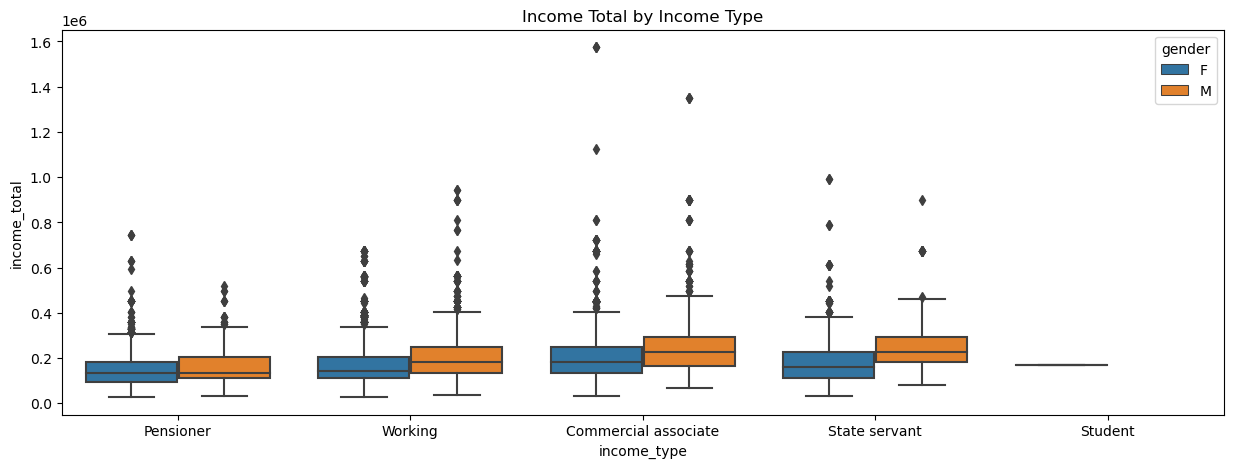

In [103]:
# 성별에 따른 income type 별 income_total 
# 각 집단의 이상치가 어떤 성별에게서 주로 나타나는지 확인

plt.figure(figsize=(15,5))
sns.boxplot(x='income_type', y='income_total', data = train, hue='gender')

plt.title('Income Total by Income Type')
plt.show()

Q6. 상관관계 확인하는 히트맵 만들기

Text(0.5, 1.0, 'Correlation Heatmap')

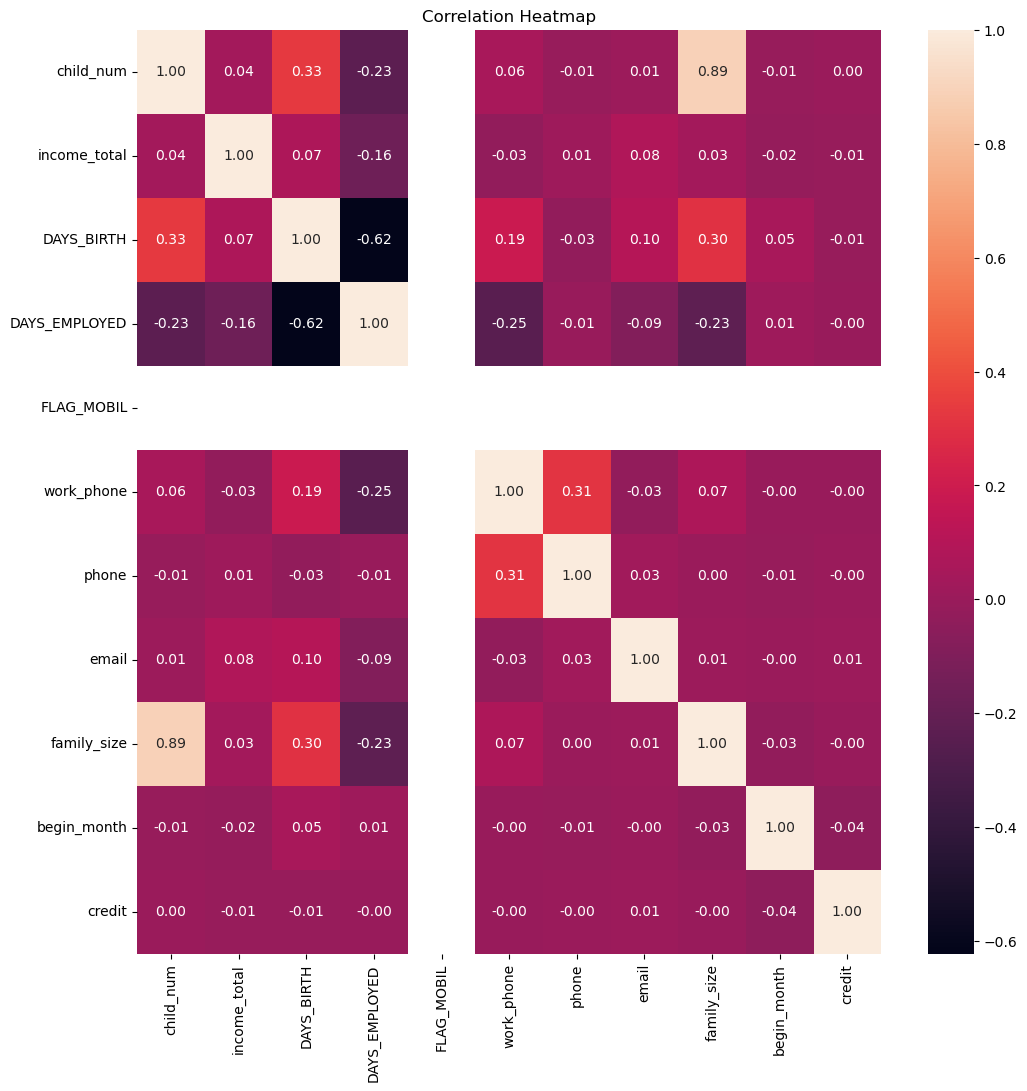

In [93]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot = True,fmt = '.2f' ) 
plt.title('Correlation Heatmap')

## **데이터 전처리**

In [3]:
### 필요한 모듈을 import ###

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

### 1. 결측치 처리

In [61]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       4132
family_size         0
begin_month         0
credit              0
dtype: int64

* occyp_type의 결측치를 대체해주세요.

In [ ]:
# 예시답안: 최빈값으로 결측값을 채우기
train['occyp_type'] = train['occyp_type'].fillna(train['occyp_type'].mode()[0])

- 전체 데이터 대비 occyp_type의 결측치 비율은 0.31% 정도로 꽤나 높은 편.
- 이 데이터를 전부 최빈값으로 채우기보다는, 관련 있어 보이는 다른 컬럼과의 관계를 파악해 결측값을 정하는 것이 적합하다고 판단

In [9]:
### occyp_type 결측치 대체

train['occyp_type'].isna().sum() / len(train['occyp_type'])

0.3123677048684608

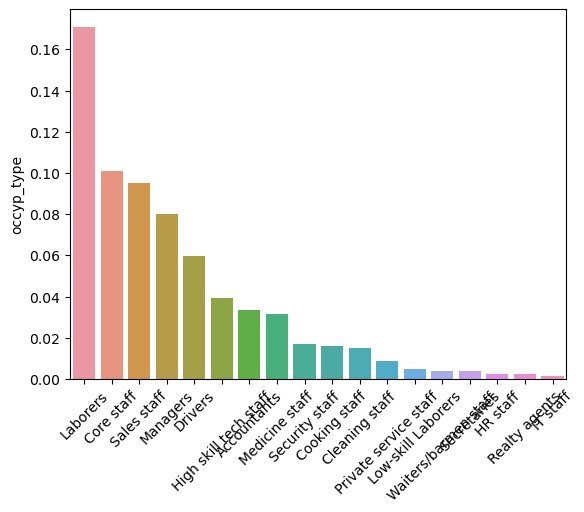

In [7]:
ratio = pd.DataFrame(train['occyp_type'].value_counts() / len(train['occyp_type']))
ratio = ratio.reset_index()

fig = sns.barplot(x = 'index', y = 'occyp_type', data = ratio)
fig.set(xlabel = None)

plt.xticks(rotation = 45)
plt.show()

In [95]:
train[train['occyp_type'].isnull()].income_type.value_counts()

Pensioner               2247
Working                 1166
Commercial associate     511
State servant            208
Name: income_type, dtype: int64

- occyp_type과 관계 있을 것으로 생각되는 income_type, edu_type 2개의 컬럼을 기준으로 결측치를 채우고자 함. (income_type, edu_type은 결측치가 없으니 가능) 
- occyp_type & income_type crosstab을 확인해보면 income type이 state servant인 경우 occyp_type은 core staff일 확률이 높고, working , pensioner type일 경우 laborers일 확률이 높다고 판단.
- 단, commercial associate의 경우 하나의 대푯값을 선정하기 무리가 있다고 생각하고 edu_type까지 함께 고려한 테이블에서 결측값을 결정하기로 함

In [14]:
pd.crosstab( train.income_type, train.occyp_type).T.style.background_gradient(cmap='summer')

income_type,Commercial associate,Pensioner,State servant,Student,Working
occyp_type,,,,,
Accountants,169,0,33,0,243
Cleaning staff,35,0,8,0,155
Cooking staff,52,0,18,0,144
Core staff,317,0,338,2,680
Drivers,221,0,44,0,526
HR staff,13,0,2,0,20
High skill tech staff,155,0,84,0,282
IT staff,8,0,2,0,10
Laborers,561,2,63,0,1634


In [177]:
condition1 = (train['income_type'] == 'State servant') 
train[condition1] = train[condition1].fillna('Core staff')

In [178]:
condition2 = (train['income_type'] == 'Pensioner') |(train ['income_type'] =='Working')
train[condition2] = train[condition2].fillna('Laborers')

- 아래 crosstab의 결과를 참고, 아래와 같이 결측치를 채우기로 결정
1) Commercial associate & Secondary special / Lower secondary -> Laborers
2) Commercial associate & incomplete higher / Higher education -> managers
3) Commercial associate & Academic degree -> Sales staff

In [47]:
pd.crosstab( [train.income_type[train['income_type']=='Commercial associate'],train.edu_type], train.occyp_type).T.style.background_gradient(cmap='summer')

In [179]:
condition3 = (train['income_type'] == 'Commercial associate') & (train['edu_type']=='Secondary / secondary special')
condition4 = (train['income_type'] == 'Commercial associate') & (train['edu_type']=='Lower secondary')
train[condition3] = train[condition3].fillna('Laborers')
train[condition4] = train[condition4].fillna('Laborers')

In [180]:
condition5 = (train['income_type'] == 'Commercial associate') & (train['edu_type']=='Incomplete higher')
condition6 = (train['income_type'] == 'Commercial associate') & (train['edu_type']=='Higher education')
train[condition5] = train[condition5].fillna('Managers')
train[condition6] = train[condition6].fillna('Managers')

In [181]:
condition7 = (train['income_type'] == 'Commercial associate') & (train['edu_type']=='Academic degree')
train[condition7] = train[condition7].fillna('Sales staff')

In [182]:
train.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

### 2. 이상치 처리

* numerical columns 중 이상치가 존재하는 column이 있다면 처리해주세요. 필요없다고 생각하면 그대로 진행해주세요.

- 현재 데이터에서 수치형 (연속형) 변수를 갖는 column은 다음과 같음 : columns = 'child_num','income_total','DAYS_BIRTH','DAYS_EMPLOYED','family_size','begin_month'
- 각각에 대해 boxplot을 그려 확인해보면 income_total, days_employed 정도의 column에서 극단적인 혹은 다수의 이상치가 발생했음을 알 수 있음. 

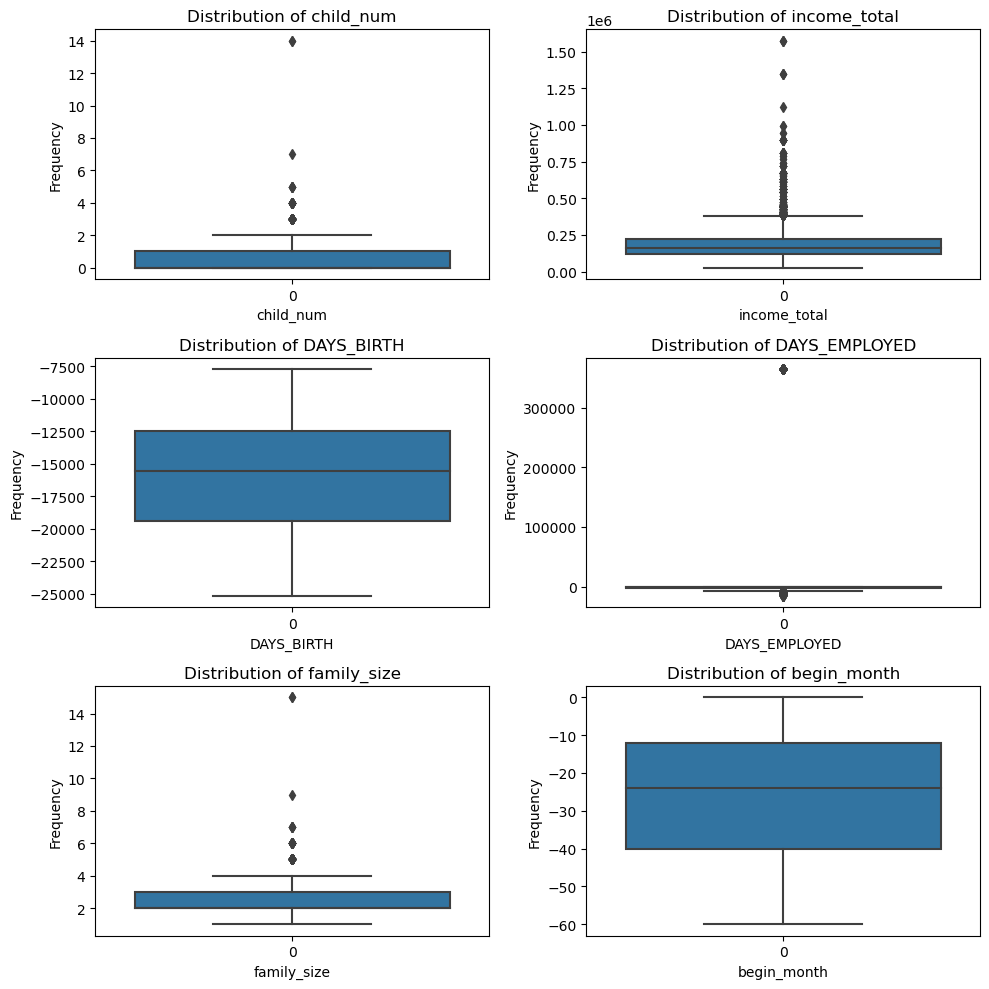

In [120]:
### 이상치 처리 ###

columns = ['child_num','income_total','DAYS_BIRTH','DAYS_EMPLOYED','family_size','begin_month']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

for i, column in enumerate(columns):
    sns.boxplot(train[column], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {column}')
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Frequency')
    axes[i//2, i%2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

* Income total <br><br/>
income_total의 경우 boxplot의 upper fence를 넘는 데이터의 수는 607개로, 전체 데이터의 약 4%를 차지함. 데이터 내의 아웃라이어 비중이 크지 않고, 연간 소득과 타겟값 사이의 관련성이 높다고 판단해 별도의 처리 과정을 거치지 않기로 결정

In [128]:
#income total의 upper fence 계산
Q1, Q2, Q3 = np.percentile(train["income_total"], [25, 50, 75])
IQR = Q3 - Q1

Q3 + IQR*1.5 

380250.0

In [134]:
train[train['income_total']>380250].occyp_type.value_counts()

Managers                 221
Laborers                 158
Core staff                74
Accountants               35
Sales staff               35
Drivers                   32
High skill tech staff     18
Security staff            10
Medicine staff             7
Private service staff      4
Cooking staff              4
IT staff                   3
Secretaries                3
HR staff                   2
Cleaning staff             1
Name: occyp_type, dtype: int64

In [133]:
607 / len(train)

0.0458875113395827

In [122]:
train['income_total']

0        202500.0
1        157500.0
2        135000.0
3        112500.0
4        225000.0
           ...   
13223    225000.0
13224    292500.0
13225    135000.0
13226    157500.0
13227     67500.0
Name: income_total, Length: 13228, dtype: float64

* Days_employed

column 설명을 참고해봤을 때, 고용되지 않은 사람의 경우 days_employed로 36523이 공통적으로 포함됨. 36523이라는 큰 값으로 고용되지 않은 상태를 표현하는 것 보다는, 발급 시 일을 시작하지 않았다는 의미로 0을 채워주기로 결정. 

In [138]:
train['DAYS_EMPLOYED'].describe()

count     13228.000000
mean      59854.037496
std      138166.424477
min      -15713.000000
25%       -3153.000000
50%       -1539.000000
75%        -401.750000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [183]:
train[train['DAYS_EMPLOYED']>0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,365243,1,0,0,0,Laborers,2,-53,1
6,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,Laborers,2,-10,1
7,M,Y,Y,1,270000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18948,365243,1,0,0,0,Laborers,3,-52,1
12,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22361,365243,1,0,0,0,Laborers,2,-30,1
14,F,Y,N,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20460,365243,1,0,0,0,Laborers,2,-20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,F,N,Y,0,121500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23784,365243,1,0,0,0,Laborers,2,-13,1
13193,F,N,Y,0,135000.0,Pensioner,Higher education,Married,House / apartment,-21226,365243,1,0,0,0,Laborers,2,-13,1
13195,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-23632,365243,1,0,0,0,Laborers,1,-18,1
13207,F,N,Y,0,360000.0,Pensioner,Higher education,Married,House / apartment,-22295,365243,1,0,0,0,Laborers,2,-17,1


In [193]:
condition = (train['DAYS_EMPLOYED']==365243)
train.loc[condition, 'DAYS_EMPLOYED'] = 0

In [194]:
train.head(5)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,0,1,0,0,0,Laborers,2,-53,1
1,F,N,N,1,157500.0,Working,Higher education,Married,House / apartment,-15773,-309,1,0,1,0,Sales staff,3,-26,0
2,M,Y,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13483,-1816,1,1,1,0,Laborers,2,-9,1
3,F,Y,N,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12270,-150,1,0,1,0,Security staff,4,-12,1
4,M,Y,Y,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,-16175,-2371,1,0,0,0,Drivers,3,-3,1


### 3-1. 범주형 변수 - 이진변수 변환

- 이진변수형 column은 다음과 같음 : 'gender', 'car', 'reality', 'work_phone', 'phone', 'email'. 이중 이미 0과 1로 encoding이 되어 있는 work_phone, phone, email을 제외하고, gender, car, reality에 대해서 변수 변환을 시도하기로 결정
- gender : F (0), M (1)
- car : N (0), Y (1)
- reality : N (0), Y (1)

In [195]:
### feature들 중 이진변수를 확인하고 올바른 전처리를 해주세요.
from sklearn.preprocessing import LabelEncoder
import pandas as pd

columns = ['gender', 'car', 'reality']
encoder = LabelEncoder()

encoded = train[columns].apply(encoder.fit_transform)

encoded

,gender,car,reality
0,0,1,1
1,0,0,0
2,1,1,0
3,0,1,0
4,1,1,1
...,...,...,...
13223,0,0,0
13224,0,1,1
13225,0,0,1
13226,1,0,1


In [196]:
train[columns] = encoded

In [197]:
train.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,1,1,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,0,1,0,0,0,Laborers,2,-53,1
1,0,0,0,1,157500.0,Working,Higher education,Married,House / apartment,-15773,-309,1,0,1,0,Sales staff,3,-26,0
2,1,1,0,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13483,-1816,1,1,1,0,Laborers,2,-9,1


### 3-2. 범주형 변수 - 나머지 범주형 인코딩

In [148]:
## 이진변수는 이미 처리했기 때문에 제외
categorical_columns = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

In [150]:
#column별 고유값 갯수 확인 
train[categorical_columns].nunique()

income_type     5
edu_type        5
family_type     5
house_type      6
occyp_type     18
dtype: int64

In [155]:
## 필요한 인코더 불러오기

onehot_encoder = OneHotEncoder()

label_encoder = LabelEncoder()

* OneHot Encoding vs Label Encoding 중 어떤 것이 더 적합한지, 왜 그런지 한줄로 적어주세요

In [199]:
### 인코딩 진행 ###

train = pd.get_dummies(train, columns=categorical_columns)

train.head(5)

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,...,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,1,1,0,202500.0,-19031,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,157500.0,-15773,-309,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,135000.0,-13483,-1816,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,2,112500.0,-12270,-150,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1,1,225000.0,-16175,-2371,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 왜 적합한가? ###

1. Label Encoding 의 경우, 명목형 컬럼의 고유값 갯수가 많거나 순서의 의미가 있을 때 사용한다. Label Encoding을 사용할 경우 변수에 부여된 숫자에 따라 위계가 생길 수 있으므로 특히 회귀 기반의 ML 알고리즘을 사용한다면 적합하지 않다.

2. One-Hot Encoding은 변수 간의 순서나 위계가 없거나, 고유값의 개수가 많지 않을 때 효율적이다.

3. 현재 데이터에서 명목형 변수의 고유값은 총 39개로, 적은 편은 아니다. 다만, 각 변수들 간의 순서나 위계가 존재하지 않고, 이진 분류를 위해 로지스틱 회귀를 적용하는 경우 Label Encoding한 값이 영향을 줄 수 있으니 feature 수가 늘어나는 것을 감수하고 One-hot encoding 하기로 결정했다.

# **Feature Engineering**

### 1. 의미없는 변수 제거

* 주어진 feature 중 의미없는 변수가 있습니다. 아래 코드를 통해 확인해보고, 제거해주세요.

In [ ]:
### 의미없는 변수 제거 ###
train.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,13228.000000,1.322800e+04,13228.000000,13228.000000,13228.0,13228.000000,13228.000000,13228.000000,13228.000000,13228.000000,13228.000000
mean,0.428107,1.888212e+05,-15958.143408,59854.037496,1.0,0.230269,0.296946,0.089507,2.192773,-26.198292,0.878213
std,0.740691,1.041743e+05,4199.720373,138166.424477,0.0,0.421021,0.456930,0.285485,0.910463,16.579604,0.327052
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19406.500000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-40.000000,1.000000
50%,0.000000,1.575000e+05,-15521.500000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,1.000000
75%,1.000000,2.250000e+05,-12454.000000,-401.750000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,1.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000


- 아래와 같이 boxplot을 그려 확인해보니, FLAG_MOBIL 컬럼의 value는 1 뿐이다. 유의미한 컬럼이 아니므로, 삭제할 수 있다. 

<Axes: xlabel='FLAG_MOBIL', ylabel='count'>

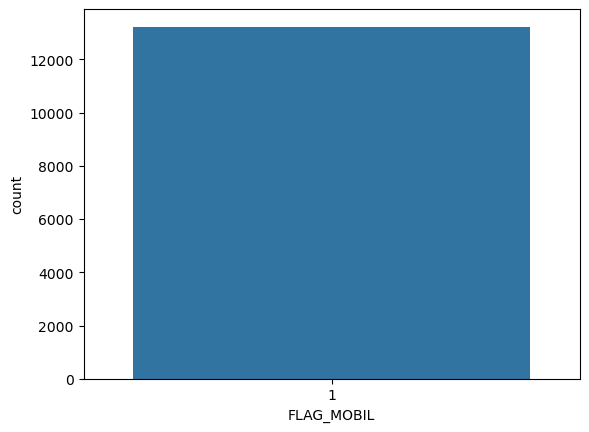

In [202]:
sns.countplot(x='FLAG_MOBIL',data=train)

In [203]:
train = train.drop('FLAG_MOBIL',axis=1)

### 2. 파생변수 생성

* 범주형 변수를 변형해 지표가 되는 feature를 새로 제작하기, 칼럼 값 세분화하기
* 도메인 지식을 바탕으로 변수들을 합쳐 새로운 변수 형성하기 등

적절한 파생변수를 1개 이상 생성하세요.

#### 출생일 기반으로 나이 계산하기 : 지표변수 생성 

- 현재 DAYS_BIRTH 컬럼은 데이터 수집 당시를 기준으로 역으로 날짜를 세어 음수로 표현되어 있음. 단순히 출생일을 세기보다는, 가입 당시의 나이를 계산하는 것이 더 유의미할 것이라고 추측하고, 관련 지표 변수 생성 절차를 진행함

In [206]:
# 음수로 되어 있는 숫자 앙수로 바꾸기 
# 바꾸는 김에 days_employed 컬럼 값도 양수로 바꿈

train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(lambda x : x*(-1))
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(lambda x : x* (-1))

#머신러닝까지 진행할 경우, test에 대해서도 양수로 처리해주기 

In [207]:
# 일을 연 단위로 바꾸기

train['age'] = train['DAYS_BIRTH'].apply(lambda x : (x//365) +1) 

## 3. 성분 축소 (선택)

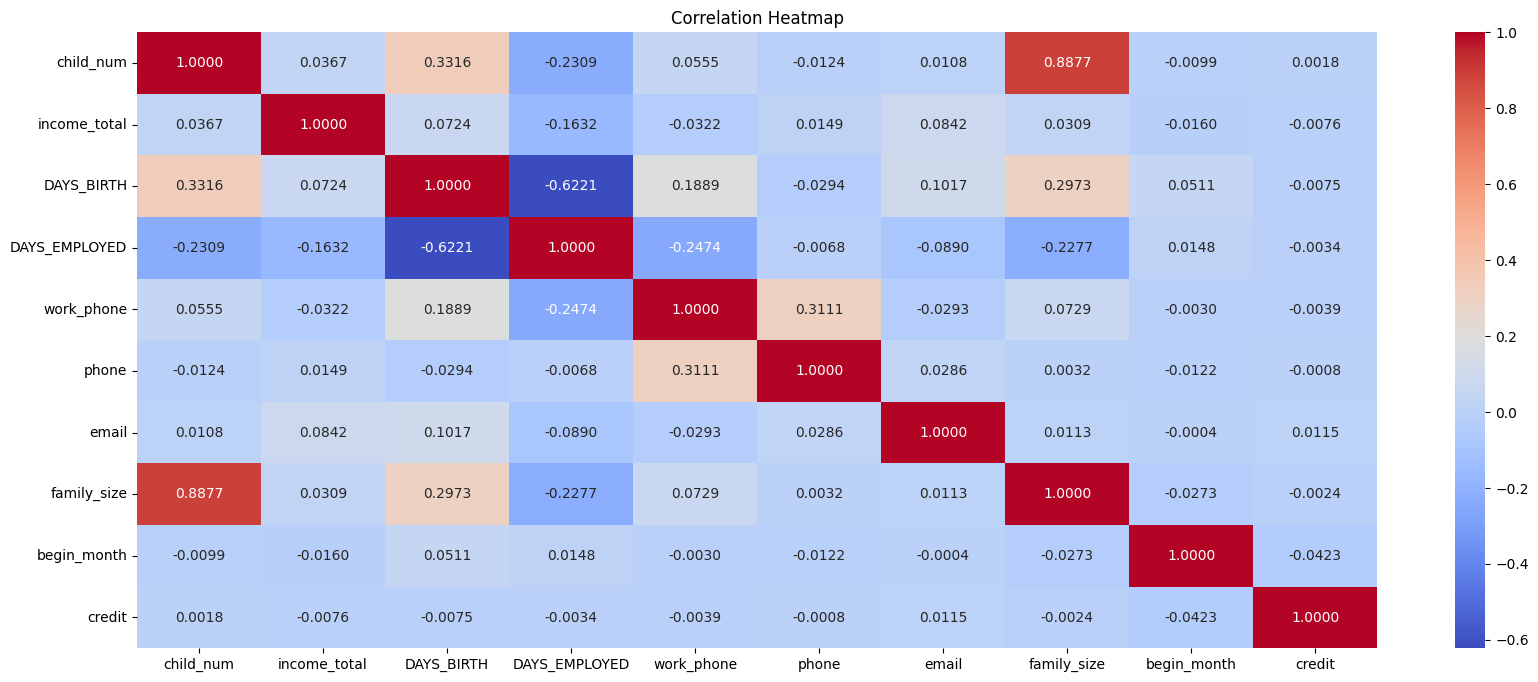

In [ ]:
correlation_matrix = train.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
### 예시1.

# family_size & child_num : 0.89로 높고 의미상으로도 관련 높음
# DAYS_BIRTH & DAYS_EMPLOYED : 0.62로 높고 의미상으로도 관련 높음
# y (credit)과의 상관관계 고려해서 더 낮은 것 drop

# train.drop(labels='child_num', axis=1, inplace=True)
# numerical_columns = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month']

In [ ]:
### 예시2.

# pca_x1 = train[['DAYS_BIRTH', 'DAYS_EMPLOYED']].values
# pca_x1 = StandardScaler().fit_transform(pca_x1)

# pca = PCA(n_components=1)
# pca_train1 = pca.fit_transform(pca_x1)

# train.drop(labels=['DAYS_BIRTH','DAYS_EMPLOYED'], axis=1, inplace=True)
# train['DAYS_BIRTH_EMPLOYED'] = pca_train1

# print(f'통합 변수 DAYS_BIRTH_EMPLOYED: 전체 데이터 분산의 {sum(pca.explained_variance_ratio_)*100}% 설명')

In [210]:
train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit', 'income_type_Commercial associate',
       'income_type_Pensioner', 'income_type_State servant',
       'income_type_Student', 'income_type_Working',
       'edu_type_Academic degree', 'edu_type_Higher education',
       'edu_type_Incomplete higher', 'edu_type_Lower secondary',
       'edu_type_Secondary / secondary special', 'family_type_Civil marriage',
       'family_type_Married', 'family_type_Separated',
       'family_type_Single / not married', 'family_type_Widow',
       'house_type_Co-op apartment', 'house_type_House / apartment',
       'house_type_Municipal apartment', 'house_type_Office apartment',
       'house_type_Rented apartment', 'house_type_With parents',
       'occyp_type_Accountants', 'occyp_type_Cleaning staff',
       'occyp_type_Cooking staff', 'occyp_type_Core staff',
       'occyp_

- one-hot encoding 된 컬럼들의 차원을 축소할 수 있을지 판단해보자 

1) edu_type column (기존 5개 -> 3개로 통합 가능)

In [217]:
pca_x1 = train[['edu_type_Academic degree', 'edu_type_Higher education',
       'edu_type_Incomplete higher', 'edu_type_Lower secondary',
       'edu_type_Secondary / secondary special']].values
#pca_x1 = StandardScaler().fit_transform(pca_x1)

pca = PCA(n_components=3)
pca_train1 = pca.fit_transform(pca_x1)

edu_pca = pca_train1
train.drop(labels=['edu_type_Academic degree', 'edu_type_Higher education',
       'edu_type_Incomplete higher', 'edu_type_Lower secondary',
       'edu_type_Secondary / secondary special'], axis=1, inplace=True)
train[['edu_type1','edu_type2','edu_type3']] = pca_train1

print(f'통합 변수 edu_pca: 전체 데이터 분산의 {sum(pca.explained_variance_ratio_)*100}% 설명')

통합 변수 edu_pca: 전체 데이터 분산의 99.73735561446772% 설명


2) occyp_type column (기존 18개 -> 11개로 통합 가능)

In [225]:
pca_x2 = train[['occyp_type_Accountants', 'occyp_type_Cleaning staff',
       'occyp_type_Cooking staff', 'occyp_type_Core staff',
       'occyp_type_Drivers', 'occyp_type_HR staff',
       'occyp_type_High skill tech staff', 'occyp_type_IT staff',
       'occyp_type_Laborers', 'occyp_type_Low-skill Laborers',
       'occyp_type_Managers', 'occyp_type_Medicine staff',
       'occyp_type_Private service staff', 'occyp_type_Realty agents',
       'occyp_type_Sales staff', 'occyp_type_Secretaries',
       'occyp_type_Security staff', 'occyp_type_Waiters/barmen staff']].values
#pca_x1 = StandardScaler().fit_transform(pca_x1)

pca = PCA(n_components=11)
pca_train1 = pca.fit_transform(pca_x2)

edu_pca = pca_train1
train.drop(labels=['occyp_type_Accountants', 'occyp_type_Cleaning staff',
       'occyp_type_Cooking staff', 'occyp_type_Core staff',
       'occyp_type_Drivers', 'occyp_type_HR staff',
       'occyp_type_High skill tech staff', 'occyp_type_IT staff',
       'occyp_type_Laborers', 'occyp_type_Low-skill Laborers',
       'occyp_type_Managers', 'occyp_type_Medicine staff',
       'occyp_type_Private service staff', 'occyp_type_Realty agents',
       'occyp_type_Sales staff', 'occyp_type_Secretaries',
       'occyp_type_Security staff', 'occyp_type_Waiters/barmen staff'], axis=1, inplace=True)

train[['occyp_1','occyp_2','occyp_3','occyp_4','occyp_5','occyp_6',
      'occyp_7','occyp_8','occyp_9','occyp_10','occyp_11']] = pca_train1

print(f'통합 변수 edu_pca: 전체 데이터 분산의 {sum(pca.explained_variance_ratio_)*100}% 설명')

통합 변수 edu_pca: 전체 데이터 분산의 97.32322384162745% 설명


In [ ]:
pca_x1 = train[['edu_type_Academic degree', 'edu_type_Higher education',
       'edu_type_Incomplete higher', 'edu_type_Lower secondary',
       'edu_type_Secondary / secondary special']].values
#pca_x1 = StandardScaler().fit_transform(pca_x1)

pca = PCA(n_components=3)
pca_train1 = pca.fit_transform(pca_x1)

edu_pca = pca_train1
train.drop(labels=['edu_type_Academic degree', 'edu_type_Higher education',
       'edu_type_Incomplete higher', 'edu_type_Lower secondary',
       'edu_type_Secondary / secondary special'], axis=1, inplace=True)
train[['edu_type1','edu_type2','edu_type3']] = pca_train1

print(f'통합 변수 edu_pca: 전체 데이터 분산의 {sum(pca.explained_variance_ratio_)*100}% 설명')

In [226]:
train.head(5)

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,...,occyp_2,occyp_3,occyp_4,occyp_5,occyp_6,occyp_7,occyp_8,occyp_9,occyp_10,occyp_11
0,0,1,1,0,202500.0,19031,0,0,0,0,...,0.015664,-0.004298,-0.021148,-0.014138,-0.004506,-0.001536,-0.005426,-0.000728,-0.000801,-0.001457
1,0,0,0,1,157500.0,15773,309,0,1,0,...,-0.349646,0.741933,-0.313463,-0.119326,-0.031744,-0.010237,-0.031143,-0.004015,-0.004357,-0.007474
2,1,1,0,0,135000.0,13483,1816,1,1,0,...,0.015664,-0.004298,-0.021148,-0.014138,-0.004506,-0.001536,-0.005426,-0.000728,-0.000801,-0.001457
3,0,1,0,2,112500.0,12270,150,0,1,0,...,-0.056972,0.018907,0.153308,0.186786,0.095721,0.041329,0.706539,-0.673453,-0.201142,-0.082610
4,1,1,1,1,225000.0,16175,2371,0,0,0,...,-0.105340,0.040621,0.836952,-0.458703,-0.079593,-0.023440,-0.058911,-0.007284,-0.007804,-0.012681


# **추가의 추가**

* ML에 대해 잘 알고 계신 분은 처리한 데이터를 활용해 분류모델도 돌려보고, 성능 테스트를 해보는 것도 권장드립니다